In [1]:
import dm_den
import dm_den_viz
import pickle
import UCI_tools.cropper
import pandas as pd
import numpy as np
import staudt_utils
import staudt_fire_utils
from importlib import reload
from adjustText import adjust_text

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from IPython.display import display, Latex
from lmfit import minimize, Parameters

from astropy import units as u
from astropy.units import cds
cds.enable()

import scipy
from scipy.stats import pearsonr
from scipy import integrate

In [2]:
def compare(df, col, ylabel, yscale, wspace=0.2):
    fig=plt.figure(figsize=(15,5))

    ax1=fig.add_subplot(131)
    ax2=fig.add_subplot(132)
    ax3=fig.add_subplot(133)
    fig.subplots_adjust(wspace=wspace)

    kwargs=dict(ycol=col, labelsize=14, yscale=yscale)
    dm_den_viz.fill_ax(ax1,
                       df[df['mass_class']==11], 
                       **kwargs,
                       ylabel=ylabel, showlabels=True)
    dm_den_viz.fill_ax(ax2,
                       df[df['mass_class']==12],
                       ylabel=None,
                       **kwargs,
                       showlabels=True,arrowprops={'arrowstyle':'-'})
    dm_den_viz.fill_ax(ax3,
                       df,
                       ylabel=None,
                       **kwargs,
                       showlabels=False)

    plt.show()
    
def analyze_df(df):
    compare(df, col='disp_vir', ylabel=dm_den_viz.disp_vir_label, yscale='linear')
    compare(df, col='mvir_fromhcat', ylabel=dm_den_viz.m_label, yscale='log', wspace=0.32)
    return None

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

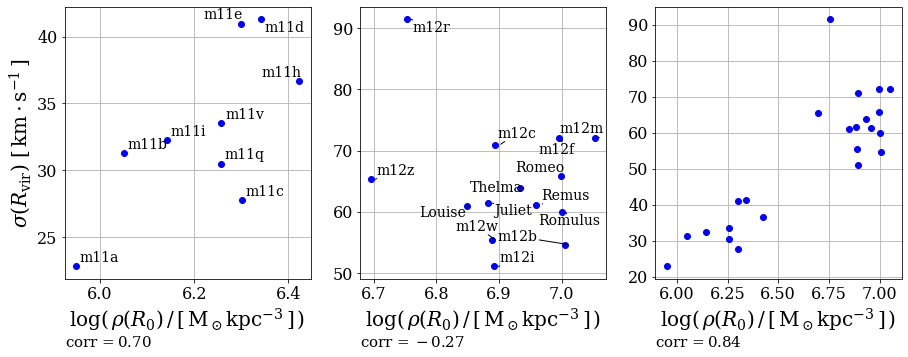

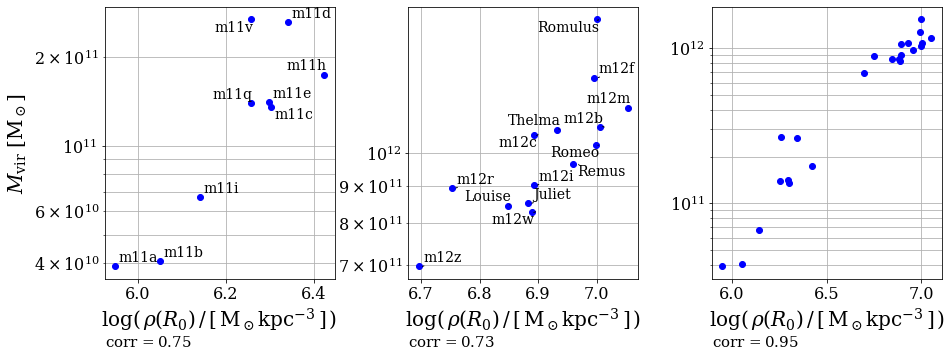

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

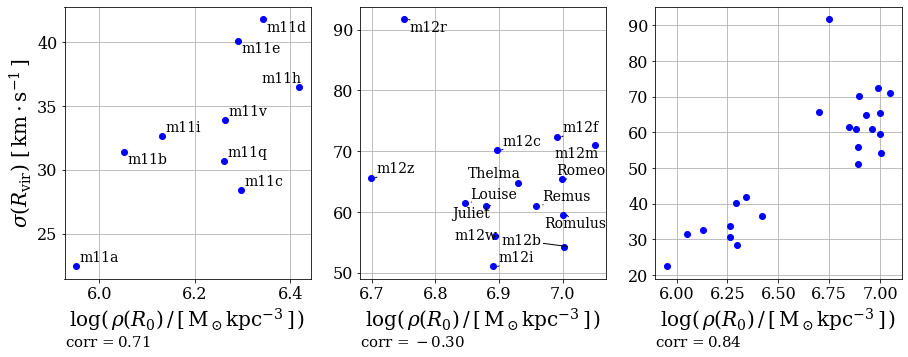

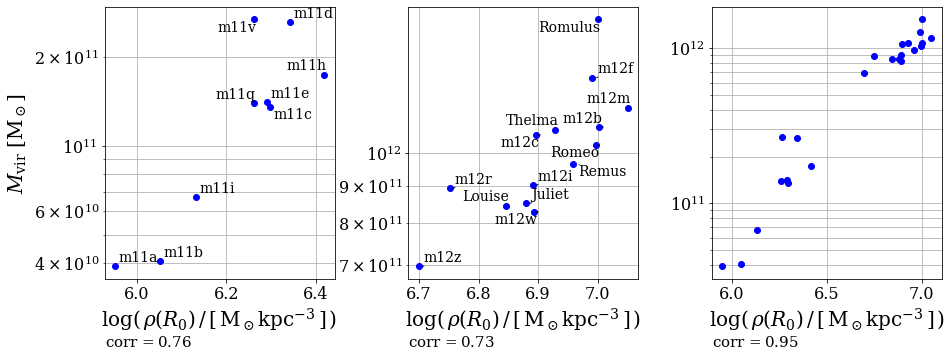

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

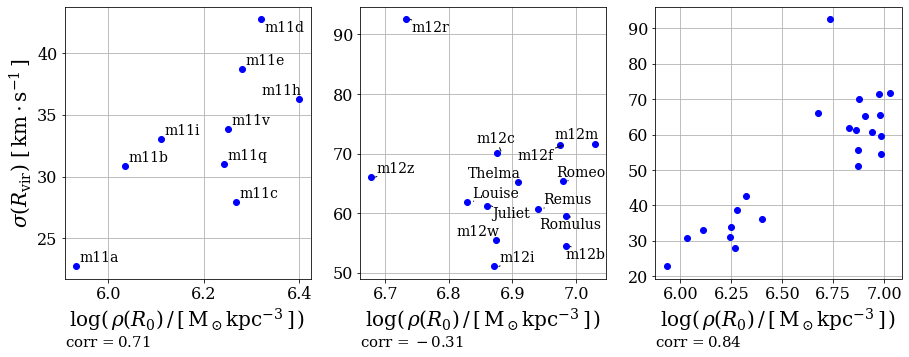

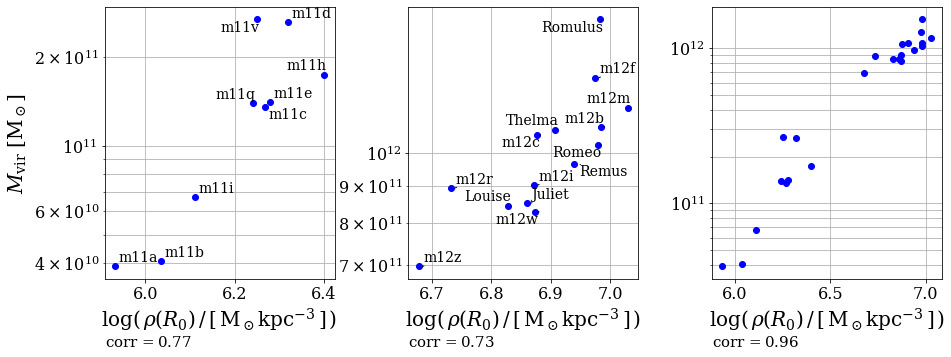

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

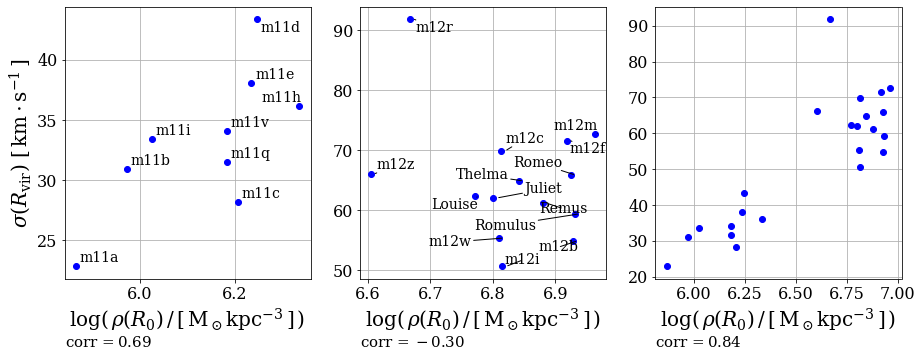

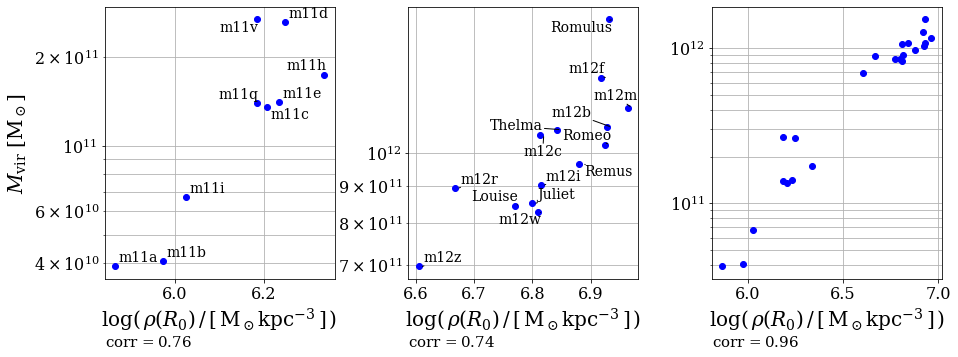

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

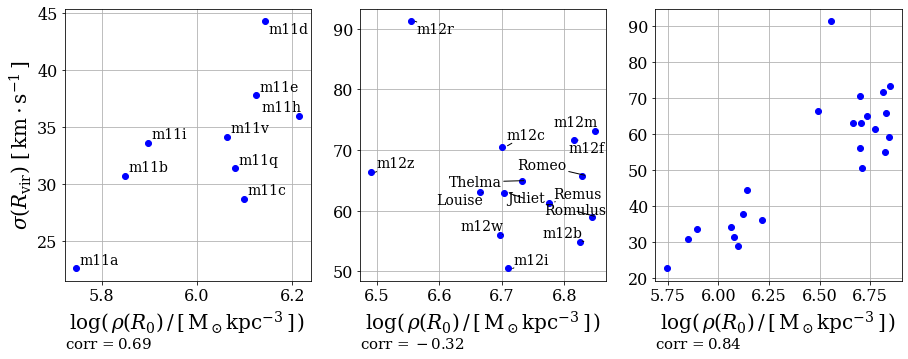

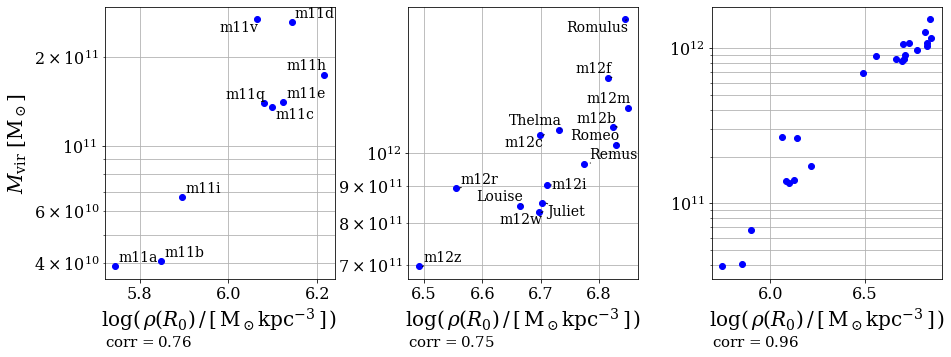

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

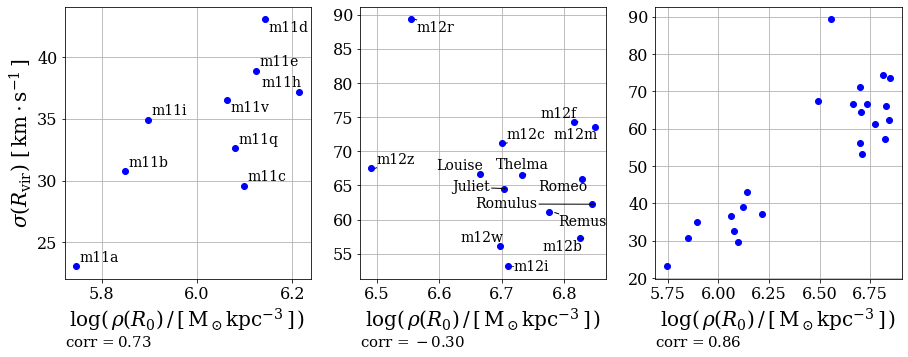

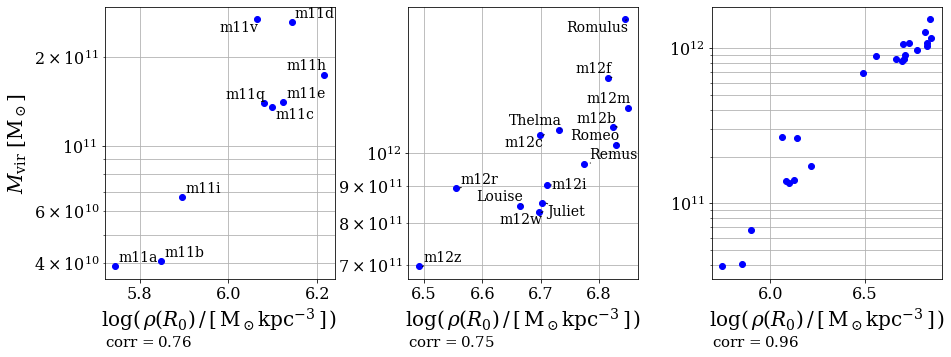

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

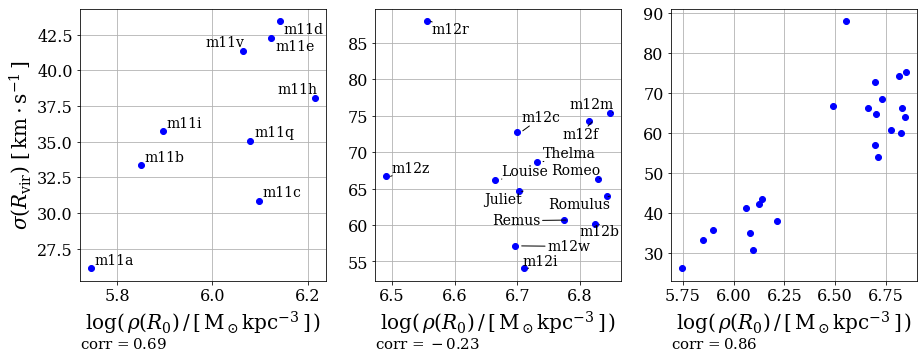

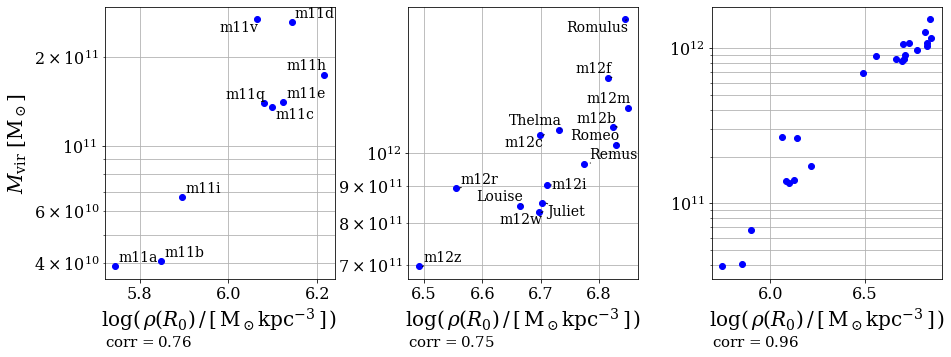

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

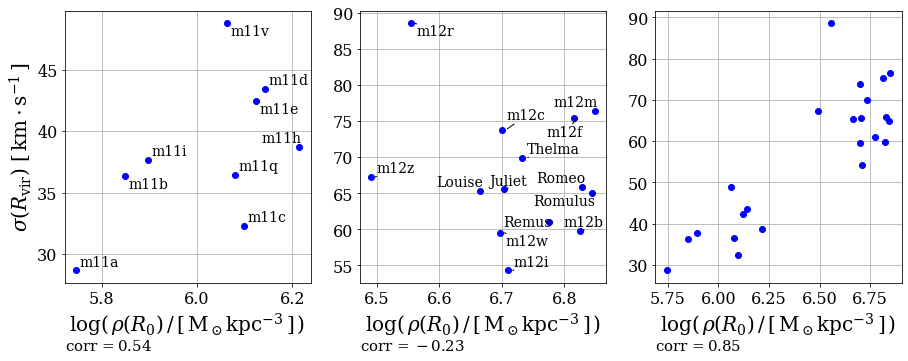

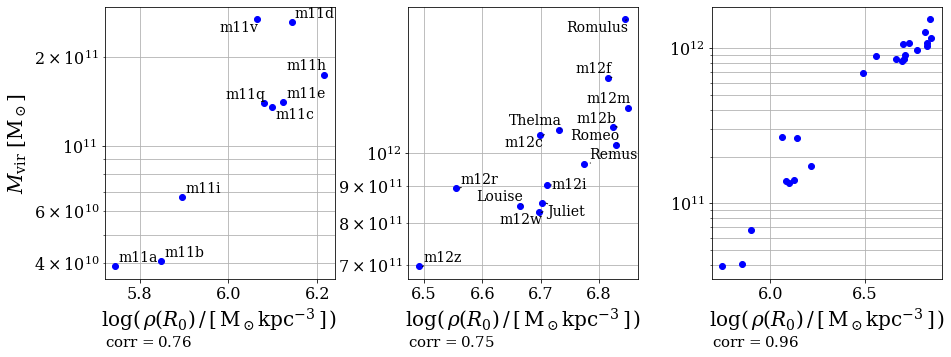

<IPython.core.display.Latex object>

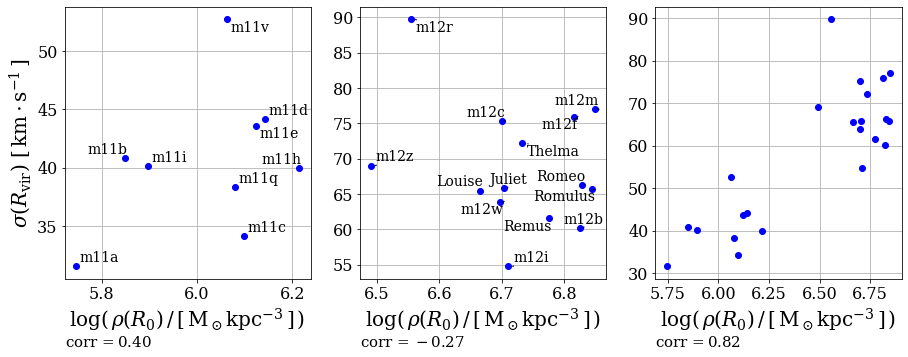

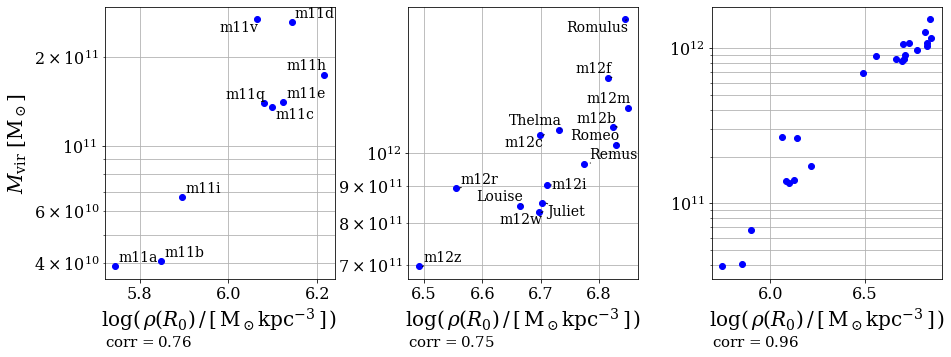

In [3]:
drs=[.1, 1.5, 5.6, 11.1, 20., 75., 125., 165., 200.]
for dr in drs:
    fname='dm_den_20210709_dr{0:05.1f}.h5'.format(dr)
    df=dm_den.load_data(fname)
    display(Latex('$\large dr={0:0.1f}\mathrm{{kpc}}$'.format(dr)))
    try:
        display(Latex('$\large dr_0={0:0.1f}\mathrm{{kpc}}$'.\
                      format(df.attrs['drsolar'])))
    except:
        pass
    analyze_df(df)

# Checking why $\sigma(R_\mathrm{vir})$ seems to not change

Unpacking PartType1 data


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Converting to ndarrays
Elapsed time: 76s
12604 particles in the shell
33462 particles in the shell
54739 particles in the shell
75651 particles in the shell
96596 particles in the shell
117495 particles in the shell
138436 particles in the shell
159265 particles in the shell
180220 particles in the shell
201270 particles in the shell
222302 particles in the shell
243183 particles in the shell
264133 particles in the shell
284945 particles in the shell
306157 particles in the shell
327081 particles in the shell
347933 particles in the shell
369150 particles in the shell
390175 particles in the shell
411029 particles in the shell
431808 particles in the shell
452818 particles in the shell
473641 particles in the shell
494460 particles in the shell
515393 particles in the shell
535847 particles in the shell
556312 particles in the shell
576553 particles in the shell
596994 particles in the shell
617420 particles in the shell
637825 particles in the shell
657958 particles in the shell
6780

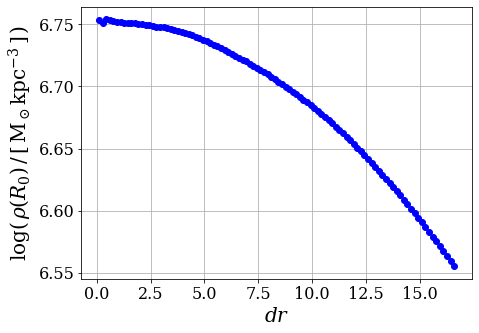

2563 particles in the shell
64582 particles in the shell
127772 particles in the shell
189104 particles in the shell
249753 particles in the shell
310378 particles in the shell
375651 particles in the shell
439809 particles in the shell
504542 particles in the shell
569846 particles in the shell
633748 particles in the shell
697801 particles in the shell
760179 particles in the shell
822738 particles in the shell
886333 particles in the shell
951029 particles in the shell
1016036 particles in the shell
1081272 particles in the shell
1144997 particles in the shell
1206716 particles in the shell
1267324 particles in the shell
1326663 particles in the shell
1385988 particles in the shell
1445765 particles in the shell
1506262 particles in the shell
1568287 particles in the shell
1629128 particles in the shell
1689446 particles in the shell
1750349 particles in the shell
1812467 particles in the shell
1876623 particles in the shell
1940358 particles in the shell
2004583 particles in the sh

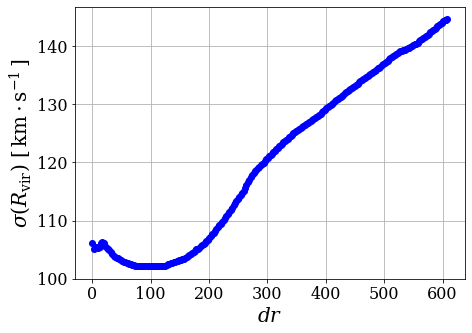

29181 particles in the shell
43201 particles in the shell
56891 particles in the shell
70088 particles in the shell
82771 particles in the shell
94592 particles in the shell
106440 particles in the shell
117465 particles in the shell
127746 particles in the shell
136904 particles in the shell
145259 particles in the shell
152190 particles in the shell
158262 particles in the shell
163456 particles in the shell
168233 particles in the shell
172109 particles in the shell
175850 particles in the shell
179457 particles in the shell
181854 particles in the shell
183688 particles in the shell
185008 particles in the shell
186172 particles in the shell
187147 particles in the shell
188285 particles in the shell
189461 particles in the shell
190848 particles in the shell
191824 particles in the shell
192419 particles in the shell
192514 particles in the shell
192233 particles in the shell
191614 particles in the shell
190958 particles in the shell
190377 particles in the shell
190573 particles

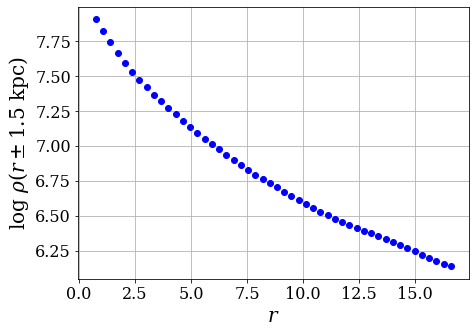

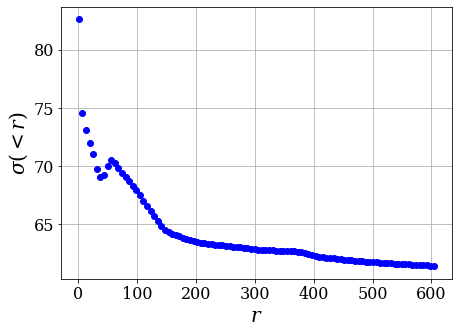

29181 particles in the shell
183448 particles in the shell
194695 particles in the shell
179107 particles in the shell
179690 particles in the shell
168994 particles in the shell
172070 particles in the shell
166938 particles in the shell
170283 particles in the shell
151979 particles in the shell
148972 particles in the shell
150655 particles in the shell
151604 particles in the shell
153985 particles in the shell
151120 particles in the shell
149733 particles in the shell
150828 particles in the shell
161162 particles in the shell
149631 particles in the shell
151794 particles in the shell
163174 particles in the shell
185975 particles in the shell
213001 particles in the shell
180596 particles in the shell
162788 particles in the shell
157235 particles in the shell
168619 particles in the shell
173370 particles in the shell
163757 particles in the shell
128414 particles in the shell
113722 particles in the shell
104408 particles in the shell
93156 particles in the shell
92146 partic

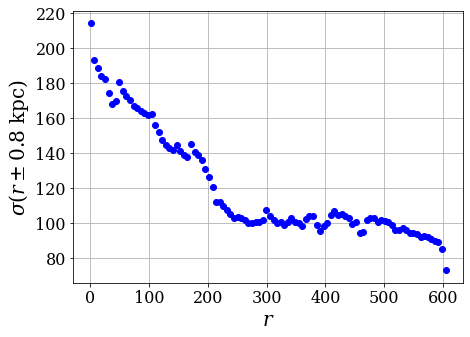

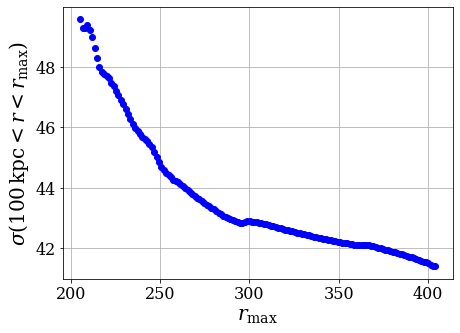

In [4]:
reload(dm_den)
reload(dm_den_viz)
dm_den.plot_tests(dm_den.load_data('dm_den_20210709_dr001.5.h5'),'m12r')

# $\sigma(R_0)$

In [2]:
df=dm_den.load_data('dm_den_20210729_dr001.5.h5')

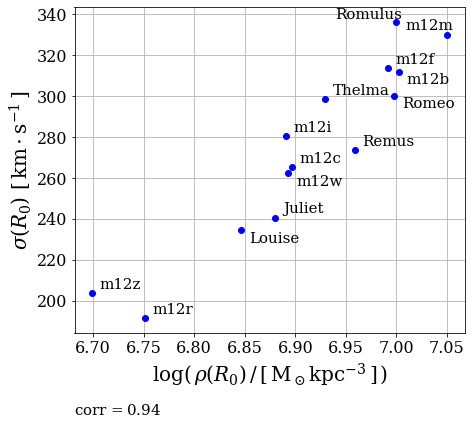

In [6]:
import importlib
importlib.reload(dm_den_viz)
dm_den_viz.plotter(df[df['mass_class']==12],
                   'disp_solar',
                   dm_den_viz.disp_solar_label,
                   figsize=(7,6))

# With DMO

In [7]:
importlib.reload(dm_den)
importlib.reload(dm_den_viz)

<module 'dm_den_viz' from '/nfspool-0/home/pstaudt/projects/project01/dm_den_viz.py'>

In [8]:
df_fire=dm_den.load_data('dm_den_20210729_dr001.5.h5')

In [9]:
df_fire=df_fire[df_fire['mass_class']==12.]

In [10]:
df_dmo=dm_den.load_data('dm_den_dmo_20210729_dr001.5.h5')

In [11]:
def fill_labels(ax,col,arrowprops=None,adjustment=None):
    texts=[]
    xs=list(np.log10(df_fire['den_solar'])) + \
       list(np.log10(df_dmo['den_solar']))
    ys=list(df_fire[col]) + \
       list(df_dmo[col])
    if adjustment=='log':
        ys=np.log10(ys)
    elif adjustment is not None:
        raise ValueError
    names=list(df_fire.index) + \
       list(df_dmo.index)
    for x,y,name in zip(xs,ys,names):
        texts+=[ax.annotate(name, (float(x*1.001),
                                   float(y*1.0001)),
                            fontsize=14.)]
    if arrowprops:
        adjust_text(texts, arrowprops=arrowprops, ax=ax)
    else:
        adjust_text(texts, ax=ax)
    return None

In [12]:
importlib.reload(dm_den_viz)
def both(showlabels=True, arrowprops={'arrowstyle':'-'}, showslopes=False):
    fig=plt.figure(figsize=(15,5))

    ax1=fig.add_subplot(131)
    ax2=fig.add_subplot(132)
    ax3=fig.add_subplot(133)
    fig.subplots_adjust(wspace=0.35)

    col='mvir_fromhcat'
    ylabel=dm_den_viz.m_label
    dm_den_viz.fill_ax(ax1,df_fire,
                       col,
                       ylabel=ylabel,
                       color='blue', showcorr=False, 
                       showlabels=False)
    dm_den_viz.fill_ax(ax1,df_dmo,
                       col,
                       ylabel=ylabel,
                       yscale='log',color='red', showcorr=False,
                       showlabels=False)
    if showlabels:
        fill_labels(ax1, col, arrowprops=arrowprops)

    col='disp_vir'
    ylabel=dm_den_viz.disp_vir_label
    dm_den_viz.fill_ax(ax2,df_fire,
                       col,
                       ylabel=ylabel,
                       color='blue', showcorr=False,
                       showlabels=False)
    dm_den_viz.fill_ax(ax2,df_dmo,
                       col,
                       ylabel=ylabel,
                       yscale='linear',color='red', showcorr=False,
                       showlabels=False)
    if showlabels:
        fill_labels(ax2, col, arrowprops=arrowprops)
   
    col='disp_solar'
    ylabel=dm_den_viz.log_disp_solar_label
    
    dm_den_viz.fill_ax(ax3,df_fire,
                       col,
                       ylabel=ylabel,
                       color='blue', showcorr=False,
                       showlabels=False, yadjustment='log')
    dm_den_viz.fill_ax(ax3,df_dmo,
                       col,
                       ylabel=ylabel,
                       yscale='linear',color='red', showcorr=False,
                       showlabels=False, yadjustment='log')
    if showslopes:
        def line(x,m,b):
            return m*x+b
        def line_slopelock(x,b):
            return x/2.+b
        log_disps_solar=np.array(list(np.log10(df_fire[col]))+list(np.log10(df_dmo[col])))
        log_dens_solar=np.array(list(np.log10(df_fire['den_solar']))+list(np.log10(df_dmo['den_solar'])))
        fit, cov = scipy.optimize.curve_fit(line,log_dens_solar,log_disps_solar,p0=[0.,0.])
        fit_slopelock, cov_slopelock = scipy.optimize.curve_fit(line_slopelock,
                                                                log_dens_solar,
                                                                log_disps_solar)
        xs_fit=np.array([log_dens_solar.min(),log_dens_solar.max()])
        ax3.plot(xs_fit,
                 line(xs_fit,*fit),
                 'g-',
                 label='best fit\n'
                       'slope = ${0:0.3f}\pm{1:0.3f}$\n'
                       'int = ${2:0.1f}\pm{3:0.1f}$'.format(fit[0],
                                                            cov[0,0],
                                                            fit[1],
                                                            cov[1,1]))
        ax3.plot(xs_fit,
                 line_slopelock(xs_fit,fit_slopelock),
                 color='orange', linestyle='-',
                 label='slope = $1/2$\n'
                       'int = ${0:0.2f}$'.format(fit_slopelock[0]))
        ax3.legend(fontsize=12., bbox_to_anchor=(0.5,0.4), loc='upper left',
                   framealpha=0.9)
    
    if showlabels:
        fill_labels(ax3, col, arrowprops=arrowprops, adjustment='log')

    legend_elems=[Line2D([0], [0], marker='o', color='w', mfc='r',
                         ms=10., label='DMO', linestyle=None),
                  Line2D([0], [0], marker='o', color='w', mfc='b',
                         ms=10., label='Full FIRE')]
    ax2.legend(handles=legend_elems, bbox_to_anchor=(0.5,-0.2),
              loc='upper center', ncol=2,
              fontsize=14.)

    plt.show()
    
    return None

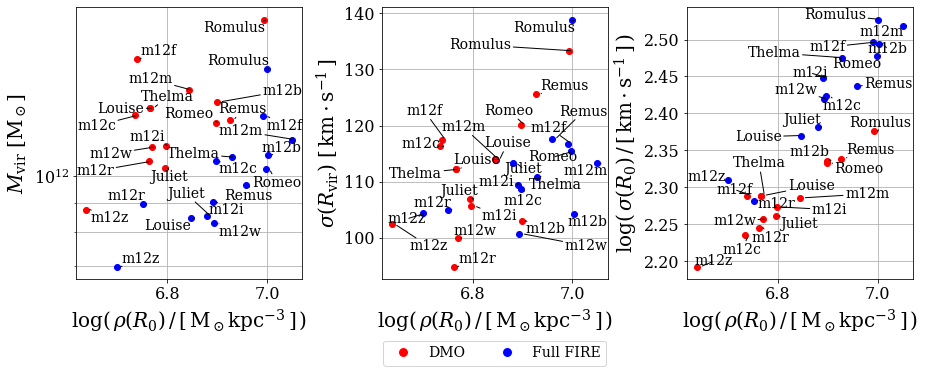

In [13]:
both()

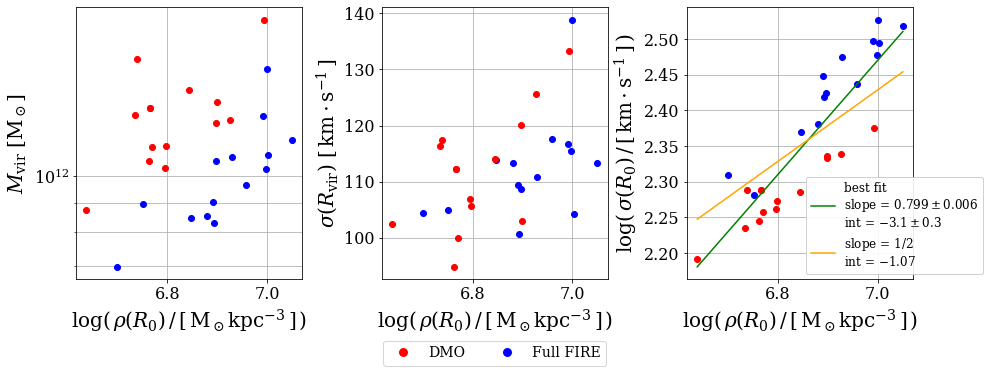

In [14]:
both(showlabels=False, showslopes=True)

## Just $\log\sigma(R_0)$

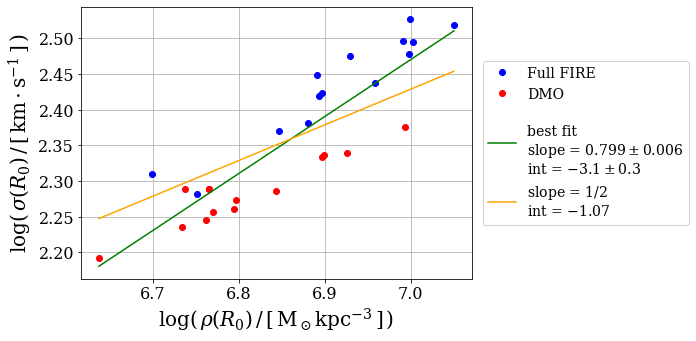

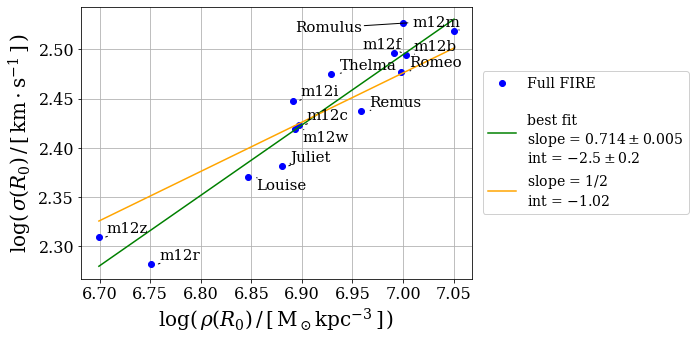

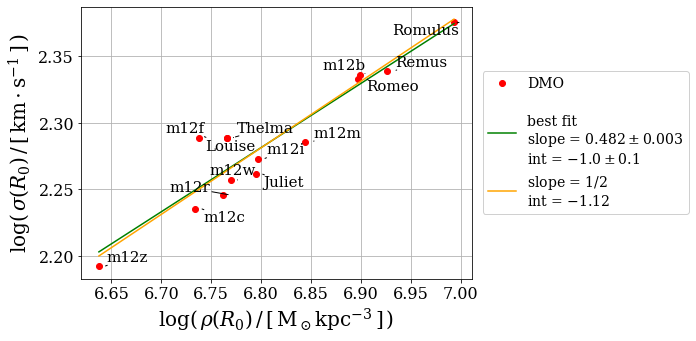

In [15]:
def plot_sigma(typ):
    importlib.reload(dm_den_viz)

    fig=plt.figure(figsize=(7,5))
    ax3=fig.add_subplot(111)

    col='disp_solar'
    ylabel=dm_den_viz.log_disp_solar_label

    log_disps_solar=np.array([])
    log_dens_solar=np.array([])
    if typ!='both':
        showlabels=True
        arrowprops={'arrowstyle':'-'}
    else:
        showlabels=False
        arrowprops=None
    if typ=='fire' or typ=='both':
        dm_den_viz.fill_ax(ax3,df_fire,
                           col,
                           ylabel=ylabel,
                           color='blue', showcorr=False,
                           showlabels=showlabels,
                           arrowprops=arrowprops,
                           yadjustment='log',
                           label='Full FIRE')
        log_disps_solar=np.log10(df_fire[col])
        log_dens_solar=np.log10(df_fire['den_solar'])
    if typ=='dmo' or typ=='both':
        dm_den_viz.fill_ax(ax3,df_dmo,
                           col,
                           ylabel=ylabel,
                           yscale='linear',color='red', showcorr=False,
                           showlabels=showlabels, 
                           arrowprops=arrowprops,
                           yadjustment='log',
                           label='DMO')
        log_disps_solar_dmo=np.log10(df_dmo[col])
        log_disps_solar=np.concatenate([log_disps_solar,log_disps_solar_dmo])
        log_dens_solar_dmo=np.log10(df_dmo['den_solar'])
        log_dens_solar=np.concatenate([log_dens_solar,log_dens_solar_dmo])
        
    def line(x,m,b):
        return m*x+b
    def line_slopelock(x,b):
        return x/2.+b
    fit, cov = scipy.optimize.curve_fit(line,log_dens_solar,log_disps_solar)
    fit_slopelock, cov_slopelock = scipy.optimize.curve_fit(line_slopelock,
                                                            log_dens_solar,
                                                            log_disps_solar)
    xs_fit=np.array([log_dens_solar.min(),log_dens_solar.max()])
    ax3.plot(xs_fit,
             line(xs_fit,*fit),
             'g-',
             label='\nbest fit\n'
                   'slope = ${0:0.3f}\pm{1:0.3f}$\n'
                   'int = ${2:0.1f}\pm{3:0.1f}$'.format(fit[0],
                                                        cov[0,0],
                                                        fit[1],
                                                        cov[1,1]))
    ax3.plot(xs_fit,
             line_slopelock(xs_fit,fit_slopelock),
             color='orange', linestyle='-',
             label='slope = $1/2$\n'
                   'int = ${0:0.2f}$'.format(fit_slopelock[0]))
    ax3.legend(fontsize=14., bbox_to_anchor=(1.01,0.5), loc='center left',
               framealpha=0.9)

    plt.show()
    
    return None
plot_sigma(typ='both')
plot_sigma(typ='fire')
plot_sigma(typ='dmo')

# Adding $\sqrt{GM/r}$ to Daniel's plot

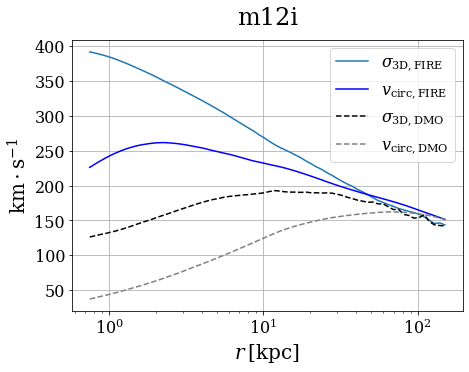

In [16]:
dm_den_viz.comp_disp_vc(rundate='20210730')

# $\rho(R_0)$ and $\sigma(R_0)$ vs $v_\mathrm{circ}$

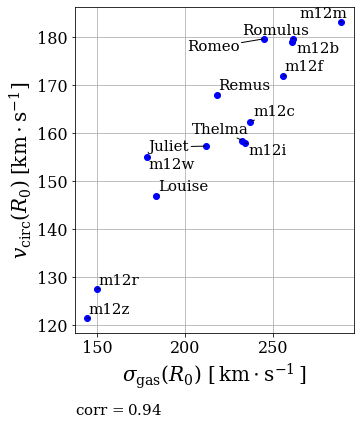

In [17]:
dm_den_viz.plotter(dm_den.load_data('dm_den_202108041642.h5'),
                   'vcirc_R0', '$v_\mathrm{circ}(R_0)\;[\mathrm{km}\cdot\mathrm{s}^{-1}]$',
                   xcol='disp_gas_solar', xadjustment=None, xlabel=dm_den_viz.disp_gas_solar_label,
                   arrowprops={'arrowstyle':'-'})

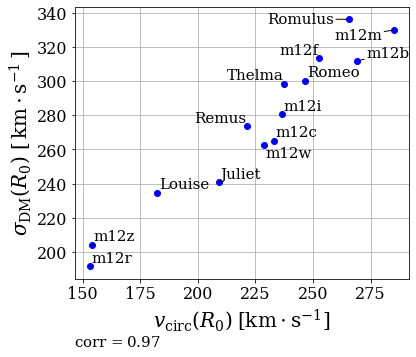

In [18]:
reload(dm_den_viz)
dm_den_viz.plotter(dm_den.load_data('dm_den_20210804_2.h5'),
                   xcol='vcirc_R0', xlabel='$v_\mathrm{circ}(R_0)\;[\mathrm{km}\cdot\mathrm{s}^{-1}]$',
                   xadjustment=None,
                   ycol='disp_solar', yadjustment=None, ylabel=dm_den_viz.disp_dm_solar_label,
                   arrowprops={'arrowstyle':'-'}, figsize=(6,5))

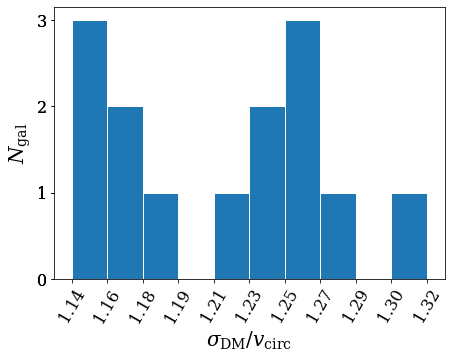

In [19]:
df=dm_den.load_data('dm_den_20210804_2.h5')
ratios=df['disp_solar'] / df['vcirc_R0']
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
counts, bins, _ = ax.hist(ratios,align='mid',ec='white')
ax.set_xlabel('$\sigma_\mathrm{DM} / v_\mathrm{circ}$')
ax.set_ylabel('$N_\mathrm{gal}$')
ax.set_xticks(bins)
ax.set_yticks(counts)
ax.set_xticklabels(['{0:0.2f}'.format(x) for x in bins], rotation=60)
fig.patch.set_facecolor('white')
plt.grid()
plt.show()

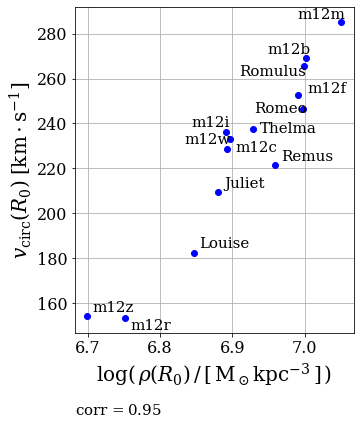

In [20]:
dm_den_viz.plotter(dm_den.load_data('dm_den_20210804_2.h5'),
                   'vcirc_R0', '$v_\mathrm{circ}(R_0)\;[\mathrm{km}\cdot\mathrm{s}^{-1}]$',
                   arrowprops=None)

# Regression

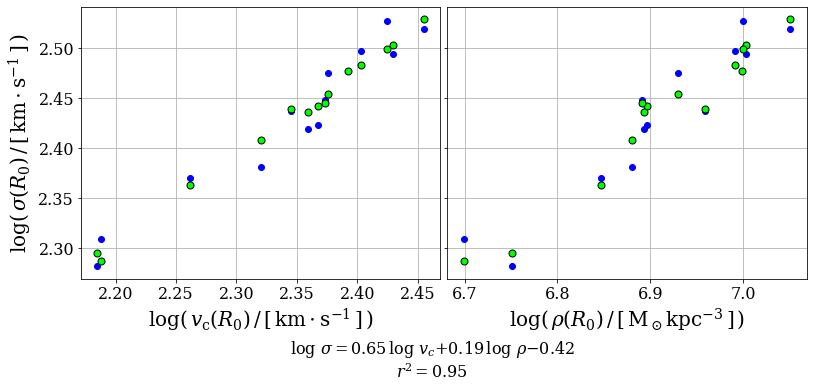

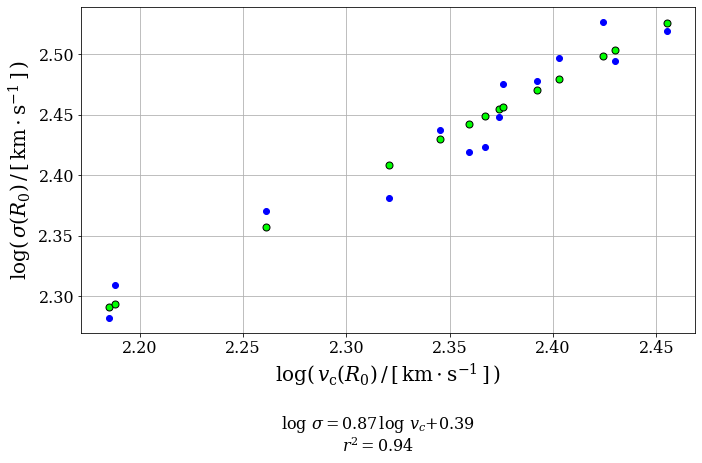

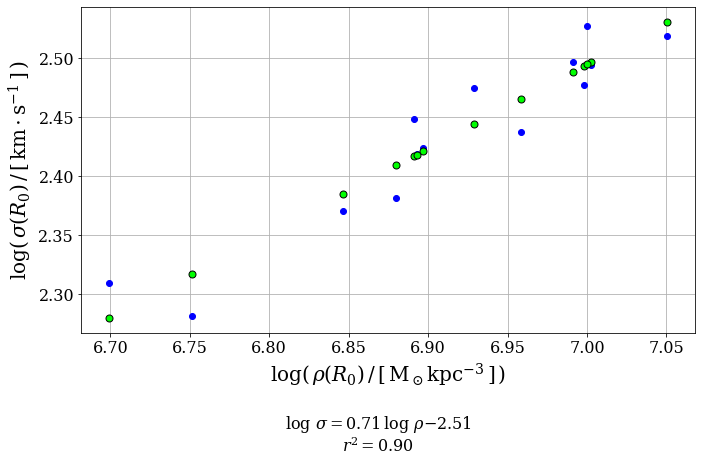

In [54]:
def plt_reg(xcols=['vcirc_R0','den_solar'], xscales=['log','log'], figsize=(13,5)):
    mlr_res = dm_den.mlr('dm_den_20210804_2.h5', xcols=xcols, ycol='disp_solar',
               xscales=xscales, yscale='log')
    coefs, intercept, r2, Xs, ys, ys_pred = mlr_res

    reload(dm_den_viz)
    fig,axs=plt.subplots(1,len(xcols),figsize=figsize,sharey=True)
    fig.subplots_adjust(wspace=0.02,hspace=0.)

    veq=''
    rhoeq=''
    if not isinstance(axs,np.ndarray):
        axs=[axs]
    for ax, xs, col in zip(axs,Xs,xcols):
        if col=='vcirc_R0':
            lab='$\log(\,v_\mathrm{c}(R_0)\,/\,[\,\mathrm{km}\cdot\mathrm{s}^{-1}\,]\,)$'
            veq='${0:0.2f}\,\log\,v_c$'.format(coefs[np.where(np.array(xcols)==col)[0][0]])
        elif col=='den_solar':
            lab=dm_den_viz.log_rho_solar_label
            rhoeq='${0:0.2f}\,\log\,\\rho$'.format(coefs[np.where(np.array(xcols)==col)[0][0]])
        else:
            raise ValueError
        ax.plot(xs, ys, 'bo')
        ax.plot(xs, ys_pred, 'o', color='lime', ms=7, mec='k')
        ax.set_xlabel(lab)
        
    axs[0].set_ylabel(dm_den_viz.log_disp_solar_label)

    if intercept<=0.:
        inteq='${0:0.2f}$'.format(intercept)
    else:
        inteq='$+{0:0.2f}$'.format(intercept)
    if len(xcols)==2:
        eq='$\log\,\sigma=$'+veq+'+'+rhoeq+inteq+'\n$r^2={0:0.2f}$'.format(r2)
    else:
        eq='$\log\,\sigma=$'+veq+rhoeq+inteq+'\n$r^2={0:0.2f}$'.format(r2)
    plt.figtext(0.5,-0.15,
                eq,
                fontsize=16, ha='center')

    fig.patch.set_facecolor('white')
    plt.show()
    return None

plt_reg()
plt_reg(xcols=['vcirc_R0'],xscales=['log'],figsize=(11,6))
plt_reg(xcols=['den_solar'],xscales=['log'],figsize=(11,6))

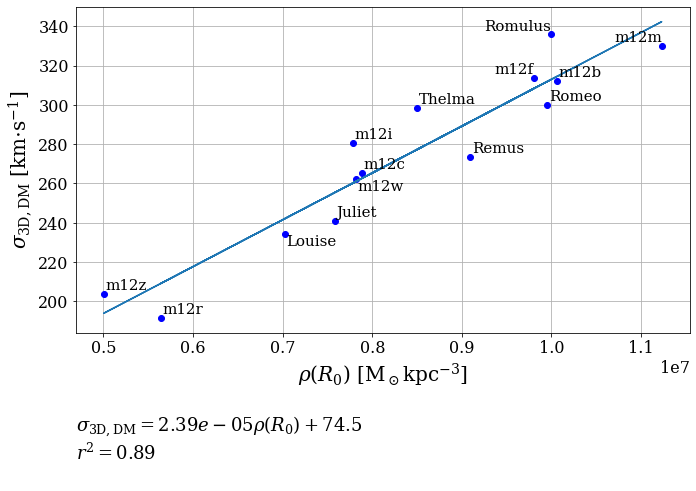

In [22]:
mlr_res = dm_den.mlr('dm_den_202202140946.h5', xcols=['den_solar'], 
                     ycol='disp_dm_solar',
                     xscales=None, yscale='linear')
coefs, intercept, r2, Xs, ys, ys_pred = mlr_res

df_new = dm_den.load_data('dm_den_202202140946.h5')

fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
dm_den_viz.fill_ax(ax, df_new, ycol='disp_dm_solar', 
                   ylabel='$\sigma_\mathrm{3D,DM}$ [km$\cdot}$s$^{-1}$]',
                   xcol='den_solar', xadjustment=None, 
                   xlabel='$\\rho(R_0)$ [M$_\odot$kpc$^{-3}$]',
                   showcorr=False)
ax.plot(Xs.values[0], ys_pred)
ax.annotate('$\sigma_\mathrm{{3D,DM}}={0:0.2e}\\rho(R_0)+{1:0.1f}$\n'
            '$r^2={2:0.2f}$\n'.format(coefs[0], intercept, r2),
            (0,-0.45),
            xycoords='axes fraction', fontsize=18)
plt.show()

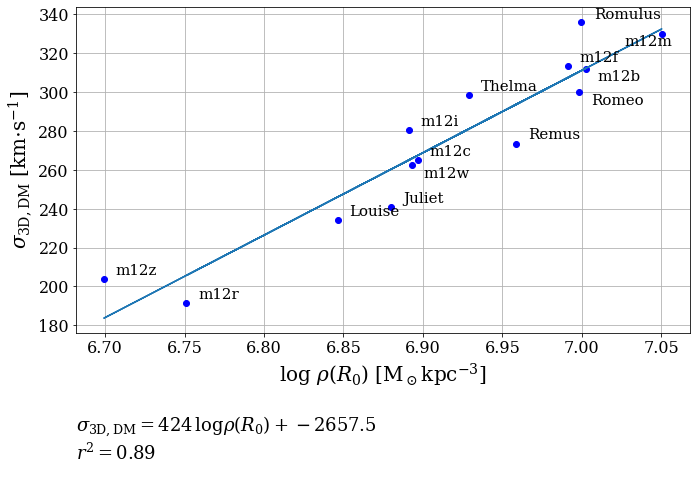

In [23]:
mlr_res = dm_den.mlr('dm_den_202202140946.h5', xcols=['den_solar'], 
                     ycol='disp_dm_solar',
                     xscales=['log'], yscale='linear')
coefs, intercept, r2, Xs, ys, ys_pred = mlr_res

df_new = dm_den.load_data('dm_den_202202140946.h5')

fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
dm_den_viz.fill_ax(ax, df_new, ycol='disp_dm_solar', 
                   ylabel='$\sigma_\mathrm{3D,DM}$ [km$\cdot}$s$^{-1}$]',
                   xcol='den_solar', xadjustment='log', 
                   xlabel='log $\\rho(R_0)$ [M$_\odot$kpc$^{-3}$]',
                   showcorr=False)
ax.plot(Xs[0], ys_pred)
ax.annotate('$\sigma_\mathrm{{3D,DM}}={0:0.0f}\,\log\\rho(R_0)+{1:0.1f}$\n'
            '$r^2={2:0.2f}$\n'.format(coefs[0], intercept, r2),
            (0,-0.45),
            xycoords='axes fraction', fontsize=18)
plt.show()

In [2]:
disp_label = '$\\sigma_\mathrm{DM}\,/\,'\
             '\\left[\mathrm{km\,s^{-1}}\\right]$'
den_label = '$\\rho_\mathrm{DM}\,/\,\\left[\mathrm{M_\odot kpc^{-3}}\\right]$'
vcirc_label = '$v_\mathrm{c}\,/\,\\left[\mathrm{km\,s^{-1}}\\right]$'
v_cool_gas_label = '$\\overline{|v_{\phi,'\
                   '_{T<10^{3}\,\mathrm{K}}}|}'\
                   '\,/\,[\mathrm{km\,s^{-1}}]$'

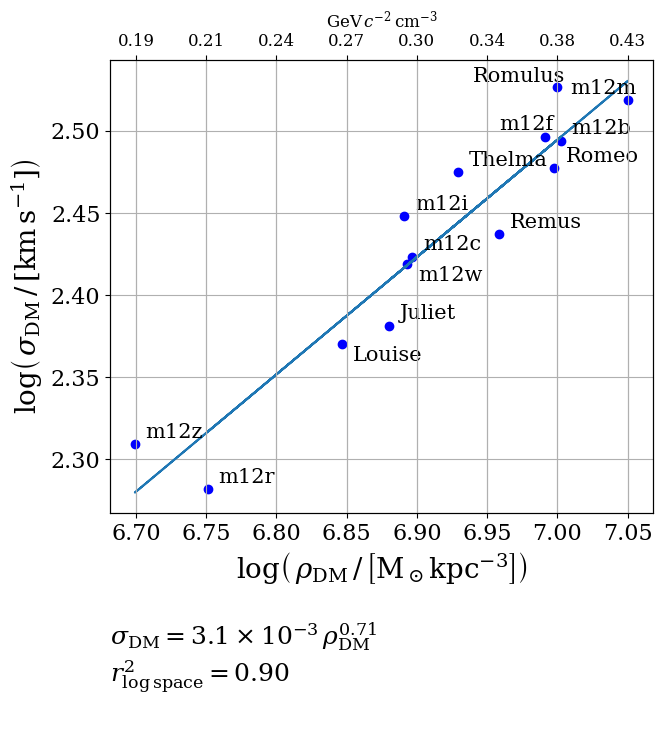

In [77]:
reload(dm_den_viz)
dm_den_viz.plt_slr('dm_den_20220613.h5', 
                   'den_solar', 'disp_dm_solar',
                   den_label, disp_label,
                   xadjustment='log', yadjustment='log', formula_y=-.45)

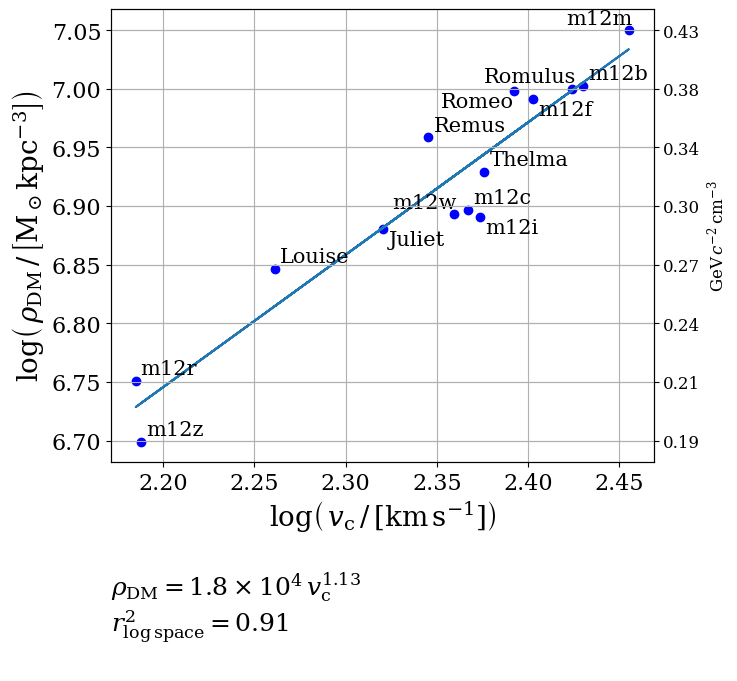

In [73]:
dm_den_viz.plt_slr('dm_den_20220613.h5', 
                   'vcirc_R0', 'den_solar',
                   vcirc_label, den_label,
                   xadjustment='log', yadjustment='log', formula_y=-.45)

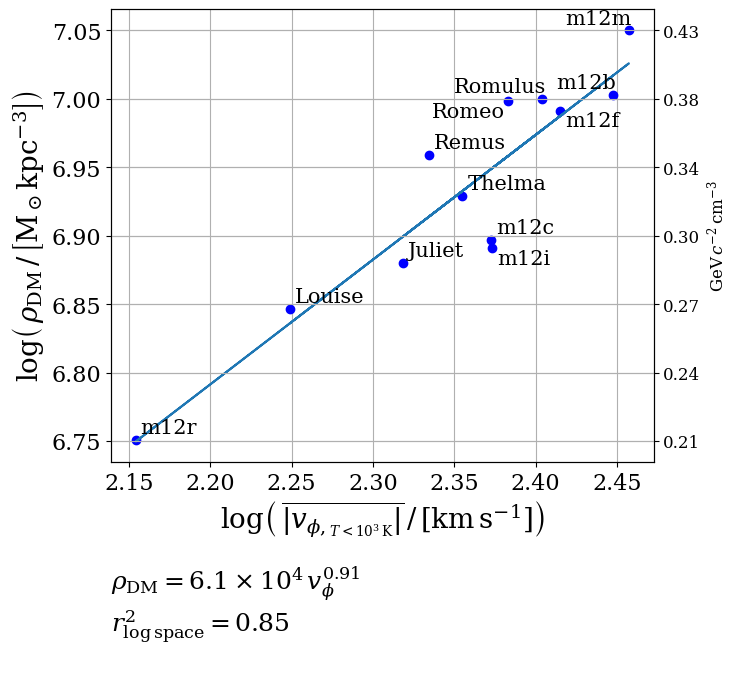

In [3]:
from importlib import reload
reload(dm_den_viz)

dm_den_viz.plt_slr('dm_den_20220613.h5', 
                   'v_cool_gas', 'den_solar',
                   v_cool_gas_label, den_label,
                   xadjustment='log', yadjustment='log', formula_y=-.45,
                   dropgals=['m12z','m12w'])